# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
# Suppress only FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import the libraries you will be using for analysis


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2


# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.16.6
pandas version: 0.25.3
matplotlib version: 3.3.2
seaborn version: 0.11.0


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtypes: datetime64[ns](2), float64(12), int64(4), object(1)
memory usage: 464.1+ MB


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import glob
import pandas as pd

files = glob.glob("2023-*.parquet")
sampled_data = pd.DataFrame()

for file in files:
    print(f"Processing: {file}")
    df = pd.read_parquet(file)

    # Convert to datetime
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Keep only rows where year is 2023
    df = df[df['tpep_pickup_datetime'].dt.year == 2023]

    # Skip if nothing valid
    if df.empty:
        continue

    # Add pickup date and hour
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    # Sample 2% per hour for each date
    for date in df['pickup_date'].unique():
        date_data = df[df['pickup_date'] == date]
        for hour in range(24):
            hour_data = date_data[date_data['pickup_hour'] == hour]
            if len(hour_data) > 0:
                sample = hour_data.sample(frac=0.02, random_state=42)
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

print("Sampling completed. Final shape:", sampled_data.shape)


Processing: 2023-5.parquet
Processing: 2023-12.parquet
Processing: 2023-7.parquet
Processing: 2023-6.parquet
Processing: 2023-1.parquet
Processing: 2023-4.parquet
Processing: 2023-8.parquet
Processing: 2023-10.parquet
Processing: 2023-2.parquet
Processing: 2023-11.parquet
Processing: 2023-9.parquet
Processing: 2023-3.parquet
Sampling completed. Final shape: (758584, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
Due to the large volume of records in the original dataset,
2% of the data was selected for analysis instead of the initially planned 5%.

The final working dataset consisted of 758584 records, ensuring manageable processing while maintaining a representative sample of the overall data.

In [6]:
# Store the df in csv/parquet
sampled_data.to_csv('eda1.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [1]:
# Load the new data file

import pandas as pd
df=pd.read_csv("eda1.csv")

In [2]:
df.head()

Airport_fee  DOLocationID  PULocationID  RatecodeID  VendorID  airport_fee  \
0          0.0           114           234         1.0         2          NaN   
1          0.0            87            48         1.0         1          NaN   
2          0.0           121           114         1.0         2          NaN   
3          0.0            68           246         1.0         1          NaN   
4          0.0           148           114         1.0         1          NaN   

   congestion_surcharge  extra  fare_amount  improvement_surcharge  ...  \
0                   2.5    1.0          8.6                    1.0  ...   
1                   2.5    3.5         23.3                    1.0  ...   
2                   2.5    1.0         91.2                    1.0  ...   
3                   2.5    3.5          5.8                    1.0  ...   
4                   2.5    3.5          7.9                    1.0  ...   

   payment_type  pickup_date  pickup_hour store_and_fwd_flag  tip_amount  \
0             1   2023-02-01            0                  N        6.12   
1             1   2023-02-01            0                  N        0.00   
2             1   2023-02-01            0                  N        6.00   
3             1   2023-02-01            0                  N        1.00   
4             1   2023-02-01            0                  N        2.55   

  tolls_amount  total_amount  tpep_dropoff_datetime  tpep_pickup_datetime  \
0          0.0         19.72    2023-02-01 00:19:52   2023-02-01 00:14:06   
1          0.0         28.30    2023-02-01 01:13:13   2023-02-01 00:54:09   
2          0.0        102.20    2023-02-01 00:59:16   2023-02-01 00:14:36   
3          0.0         11.80    2023-02-01 00:53:12   2023-02-01 00:49:25   
4          0.0         15.45    2023-02-01 00:22:02   2023-02-01 00:16:02   

  trip_distance  
0          1.25  
1          5.00  
2         24.04  
3          0.60  
4          0.90  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758584 entries, 0 to 758583
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Airport_fee            673503 non-null  float64
 1   DOLocationID           758584 non-null  int64  
 2   PULocationID           758584 non-null  int64  
 3   RatecodeID             732914 non-null  float64
 4   VendorID               758584 non-null  int64  
 5   airport_fee            59411 non-null   float64
 6   congestion_surcharge   732914 non-null  float64
 7   extra                  758584 non-null  float64
 8   fare_amount            758584 non-null  float64
 9   improvement_surcharge  758584 non-null  float64
 10  mta_tax                758584 non-null  float64
 11  passenger_count        732914 non-null  float64
 12  payment_type           758584 non-null  int64  
 13  pickup_date            758584 non-null  object 
 14  pickup_hour            758584 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [4]:
# Fix the index and drop any columns that are not needed

In [5]:
# checking if any column is having single value ,just in case if any column as 1 as value to drop
df.nunique().sort_values()

store_and_fwd_flag            2
airport_fee                   3
VendorID                      3
Airport_fee                   4
improvement_surcharge         4
congestion_surcharge          4
payment_type                  5
RatecodeID                    7
mta_tax                       8
passenger_count              10
pickup_hour                  24
extra                        49
PULocationID                250
DOLocationID                259
pickup_date                 365
tolls_amount                470
tip_amount                 3151
trip_distance              3462
fare_amount                5680
total_amount              11950
tpep_pickup_datetime     746534
tpep_dropoff_datetime    746757
dtype: int64

In [6]:
# We should drop the airport column as there are 2 columns with the same name but in different case




**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [7]:
# Combine the two airport fee columns

In [8]:
df['airport_fee'].value_counts(dropna=False)

airport_fee
 NaN     699173
 0.00     54177
 1.25      5233
-1.25         1
Name: count, dtype: int64

In [9]:
df['Airport_fee'].value_counts(dropna=False)

Airport_fee
 0.00    614462
 NaN      85081
 1.75     48312
 1.25     10723
-1.75         6
Name: count, dtype: int64

In [10]:
df1 = df[['airport_fee', 'Airport_fee']].fillna('[null]').replace('', '[blank]')

In [11]:
grouped = df1.groupby(['airport_fee', 'Airport_fee']).size().reset_index(name='count')
print(grouped)

  airport_fee Airport_fee   count
0       -1.25      [null]       1
1         0.0      [null]   54177
2        1.25      [null]    5233
3      [null]       -1.75       6
4      [null]         0.0  614462
5      [null]        1.25   10723
6      [null]        1.75   48312
7      [null]      [null]   25670


In [12]:
# process to combine airport fee and drop the extra column
# new one
df['airport_fee_combined'] = df['airport_fee'].combine_first(df['Airport_fee'])
# rename new one
df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)
df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)

In [13]:
len(df)

758584

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758584 entries, 0 to 758583
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DOLocationID           758584 non-null  int64  
 1   PULocationID           758584 non-null  int64  
 2   RatecodeID             732914 non-null  float64
 3   VendorID               758584 non-null  int64  
 4   congestion_surcharge   732914 non-null  float64
 5   extra                  758584 non-null  float64
 6   fare_amount            758584 non-null  float64
 7   improvement_surcharge  758584 non-null  float64
 8   mta_tax                758584 non-null  float64
 9   passenger_count        732914 non-null  float64
 10  payment_type           758584 non-null  int64  
 11  pickup_date            758584 non-null  object 
 12  pickup_hour            758584 non-null  int64  
 13  store_and_fwd_flag     732914 non-null  object 
 14  tip_amount             758584 non-nu

In [16]:
fare_amount_neg = (df['fare_amount'] < 0).sum()
print(f"fare_amount_negative count is:{fare_amount_neg}")

extra_neg = (df['extra'] < 0).sum()
print(f"extra_negative count is:{extra_neg}")

mta_tax_neg = (df['mta_tax'] < 0).sum()
print(f"mta_tax_negative count is:{mta_tax_neg}")

tip_amount_neg = (df['tip_amount'] < 0).sum()
print(f"tip_amount_negative count is:{tip_amount_neg}")

tolls_amount_neg = (df['tolls_amount'] < 0).sum()
print(f"tolls_amount_negative count is:{tolls_amount_neg}")

improvement_surcharge_neg = (df['improvement_surcharge'] < 0).sum()
print(f"improvement_surcharge_negative count is:{improvement_surcharge_neg}")

total_amount_neg = (df['total_amount'] < 0).sum()
print(f"total_amount_negative count is:{total_amount_neg}")

congestion_surcharge_neg = (df['congestion_surcharge'] < 0).sum()
print(f"congestion_surcharge_negative count is:{congestion_surcharge_neg}")

airport_fee_neg = (df['airport_fee'] < 0).sum()
print(f"airport_fee_negative count is:{airport_fee_neg}")


fare_amount_negative count is:0
extra_negative count is:2
mta_tax_negative count is:36
tip_amount_negative count is:0
tolls_amount_negative count is:0
improvement_surcharge_negative count is:38
total_amount_negative count is:38
congestion_surcharge_negative count is:29
airport_fee_negative count is:7


Did you notice something different in the `RatecodeID` column for above records?

In [17]:
# Analyse RatecodeID for the negative fare amounts

df['RatecodeID'].unique()

array([ 1.,  2., nan, 99.,  5.,  3.,  4.,  6.])

In [18]:
# We are not supposed to have the data for rate code 99 as per the databook

In [19]:
df['RatecodeID'].value_counts(dropna=False, normalize=True)

RatecodeID
1.0     0.912122
2.0     0.037727
NaN     0.033839
99.0    0.005620
5.0     0.005438
3.0     0.003256
4.0     0.001996
6.0     0.000003
Name: proportion, dtype: float64

In [20]:
df = df[df['RatecodeID'] != 99]
len(df)

754321

In [21]:
df['RatecodeID'].value_counts(dropna=False, normalize=True)

RatecodeID
1.0    0.917277
2.0    0.037940
NaN    0.034031
5.0    0.005468
3.0    0.003274
4.0    0.002007
6.0    0.000003
Name: proportion, dtype: float64

In [22]:
# Find which columns have negative values
# extra_negative count is:2
# mta_tax_negative count is:36
# improvement_surcharge_negative count is:38
# total_amount_negative count is:38
# congestion_surcharge_negative count is:29
# airport_fee_negative count is:7

In [23]:
# fix these negative values
df=df[~(df['extra'] < 0)]
df=df[~(df['mta_tax'] < 0)]
df=df[~(df['improvement_surcharge'] < 0)]
df=df[~(df['total_amount'] < 0)]
df=df[~(df['congestion_surcharge'] < 0)]
df=df[~(df['airport_fee'] < 0)]

In [24]:
len(df)

754282

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column
df.isnull().mean().sort_values(ascending=False)*100


RatecodeID               3.403236
congestion_surcharge     3.403236
airport_fee              3.403236
store_and_fwd_flag       3.403236
passenger_count          3.403236
VendorID                 0.000000
PULocationID             0.000000
DOLocationID             0.000000
extra                    0.000000
mta_tax                  0.000000
payment_type             0.000000
improvement_surcharge    0.000000
fare_amount              0.000000
pickup_hour              0.000000
pickup_date              0.000000
tolls_amount             0.000000
tip_amount               0.000000
total_amount             0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
trip_distance            0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

In [27]:
df = df[df['passenger_count'].notnull()]
len(df)

728612

Did you find zeroes in passenger_count? Handle these.

In [28]:
# yes i found 0 in passenger count will be droppping those rows

In [29]:
df = df[df['passenger_count']!=0]
len(df)

716833

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [30]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts(dropna=False, normalize=True)

RatecodeID
1.0    0.949412
2.0    0.039461
5.0    0.005635
3.0    0.003400
4.0    0.002090
6.0    0.000003
Name: proportion, dtype: float64

In [31]:
df = df[df['RatecodeID'].notnull()]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [32]:
# handle null values in congestion_surcharge

df = df[df['congestion_surcharge'].notnull()]


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [33]:
# Handle any remaining missing values

null_columns = df.columns[df.isnull().any()]
null_columns

Index([], dtype='object')

In [34]:
null_counts = df.isnull().sum()
null_counts

DOLocationID             0
PULocationID             0
RatecodeID               0
VendorID                 0
congestion_surcharge     0
extra                    0
fare_amount              0
improvement_surcharge    0
mta_tax                  0
passenger_count          0
payment_type             0
pickup_date              0
pickup_hour              0
store_and_fwd_flag       0
tip_amount               0
tolls_amount             0
total_amount             0
tpep_dropoff_datetime    0
tpep_pickup_datetime     0
trip_distance            0
airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [35]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns


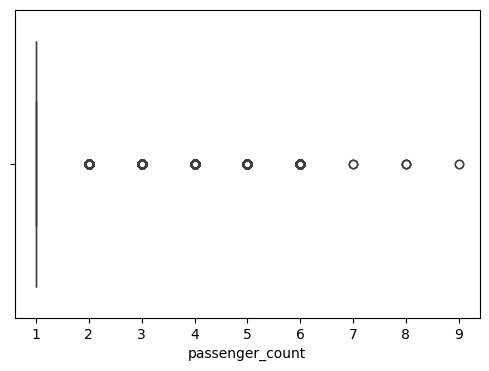

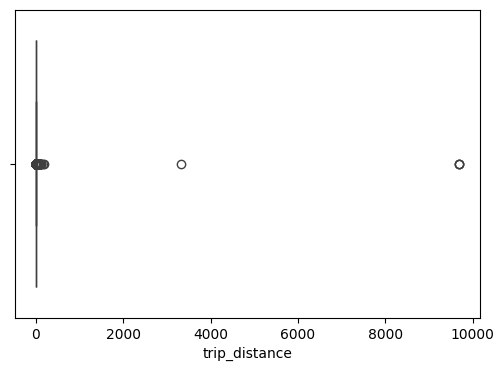

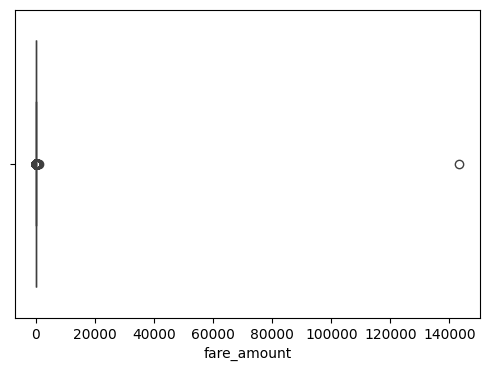

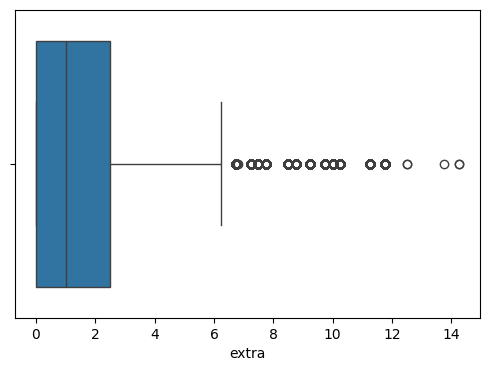

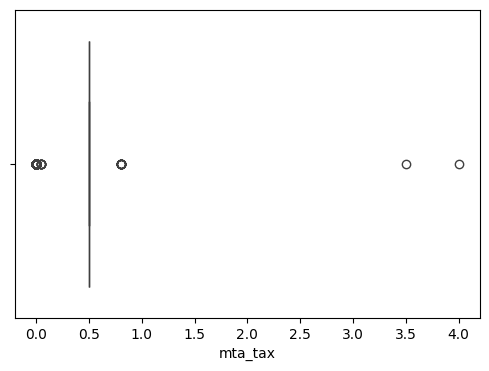

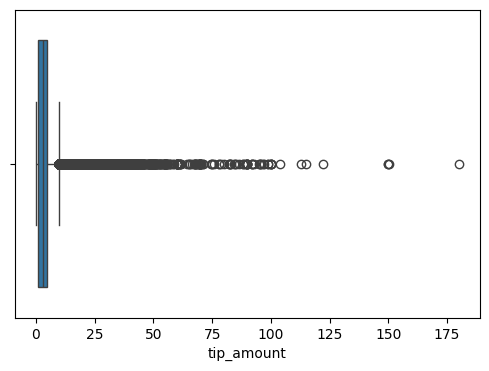

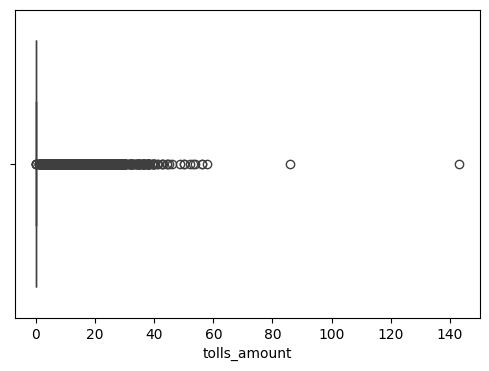

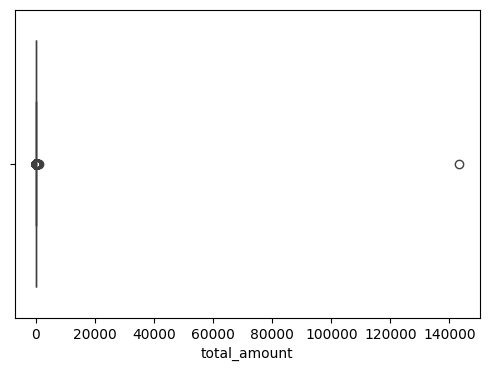

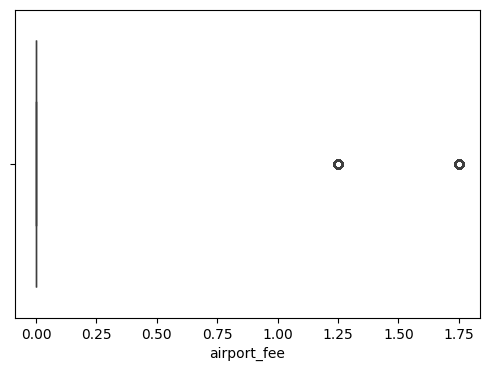

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['passenger_count'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['trip_distance'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['fare_amount'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['extra'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['mta_tax'])
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tip_amount'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tolls_amount'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['total_amount'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['airport_fee'])
plt.show()


In [37]:
len(df)

716833

In [38]:
df['fare_amount'].describe()

count    716833.000000
mean         19.891088
std         170.054432
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max      143163.450000
Name: fare_amount, dtype: float64

fare amount 
Q1 = 9.3
Q3 = 21.9
IQR = Q3 - Q1  # 21.9 - 9.3 = 12.6
upper_bound = Q3 + 1.5 * IQR  # 21.9 + 1.5*12.6 = 21.9 + 18.9 = 40.8

In [39]:
df['total_amount'].describe()

count    716833.000000
mean         29.053911
std         170.609419
min           0.000000
25%          15.960000
50%          21.000000
75%          30.600000
max      143167.450000
Name: total_amount, dtype: float64

total_amount
Q1  = 15.96
Q3  = 30.60
IQR = 30.60 − 15.96 = 14.64
upper_bound=30.60+(1.5×14.64)=30.60+21.96= 52.56

In [41]:
# Calculate the 95th percentile of fare_amount
fare_95 = df['fare_amount'].quantile(0.95)
total_95 = df['total_amount'].quantile(0.95)
print(fare_95)
print(total_95)


70.0
83.0


In [42]:

df = df[df['fare_amount'] <= fare_95]
df = df[df['total_amount'] <= total_95]
len(df)

680318

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [43]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
len(df)

680318

In [202]:
# Continue with outlier handling


In [44]:
condition_2=df[(df['trip_distance'] <= 0) & (df['fare_amount'] > 300)]
len(condition_2)

condition_3 = df[(df['trip_distance'] == 0) & 
                 (df['fare_amount'] == 0) & 
                 (df['PULocationID'] != df['DOLocationID'])]
len(condition_3)


20

In [45]:
df = df[~((df['trip_distance'] <=0 ) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]


In [46]:
len(df)

680298

In [47]:
df = df[df['trip_distance'] <250]

In [48]:
len(df)

680295

In [49]:
df['payment_type'].value_counts()

payment_type
1    550491
2    121416
4      5178
3      3210
Name: count, dtype: int64

In [50]:
len(df)

680295

In [51]:
# df = df[df['payment_type']!=0] or 
# df['payment_type']=df['payment_type'].replace(0,1)

In [89]:
# len(df)

In [ ]:
# Do any columns need standardising?


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [52]:
df.columns.tolist()

['DOLocationID',
 'PULocationID',
 'RatecodeID',
 'VendorID',
 'congestion_surcharge',
 'extra',
 'fare_amount',
 'improvement_surcharge',
 'mta_tax',
 'passenger_count',
 'payment_type',
 'pickup_date',
 'pickup_hour',
 'store_and_fwd_flag',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'tpep_dropoff_datetime',
 'tpep_pickup_datetime',
 'trip_distance',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categotical
* `tpep_pickup_datetime`:Datetime
* `tpep_dropoff_datetime`:Datetime
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categotical
* `PULocationID`:Categotical
* `DOLocationID`:Categotical
* `payment_type`:Categotical
* `pickup_hour`:it can be both 
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:Numerical
* `extra`:Numerical
* `mta_tax`:Numerical
* `tip_amount`:Numerical
* `tolls_amount`:Numerical
* `improvement_surcharge`:Numerical
* `total_amount`:Numerical
* `congestion_surcharge`:Numerical
* `airport_fee`:Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

   pickup_hour  pickup_count
0            0         19227
1            1         13104
2            2          8698
3            3          5642
4            4          3427


<Axes: xlabel='pickup_hour', ylabel='pickup_count'>

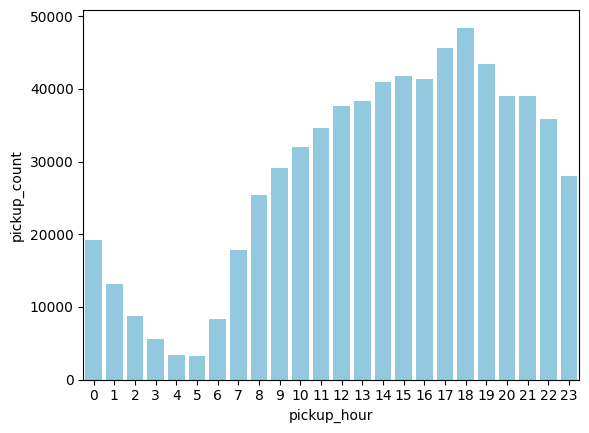

In [53]:
# Find and show the hourly trends in taxi pickups
hourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')
print(hourly_trend.head())
sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_trend, color='skyblue')


   day_of_week  pickup_count
0            0         83812
1            1         98931
2            2        104783
3            3        107036
4            4        100873


<Axes: xlabel='day_of_week', ylabel='pickup_count'>

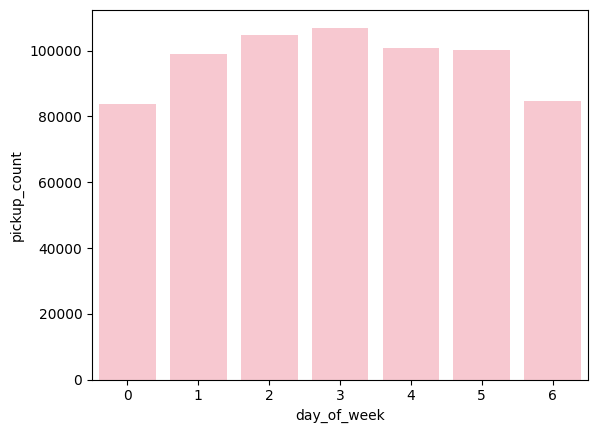

In [54]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['day_of_week'] = df['pickup_date'].dt.dayofweek
weekly_trend = df.groupby('day_of_week').size().reset_index(name='pickup_count')
print(weekly_trend.head())
sns.barplot(x='day_of_week', y='pickup_count', data=weekly_trend, color='pink')


   month  pickup_count
0      1         55512
1      2         52762
2      3         61122
3      4         58691
4      5         62505


<Axes: xlabel='month', ylabel='pickup_count'>

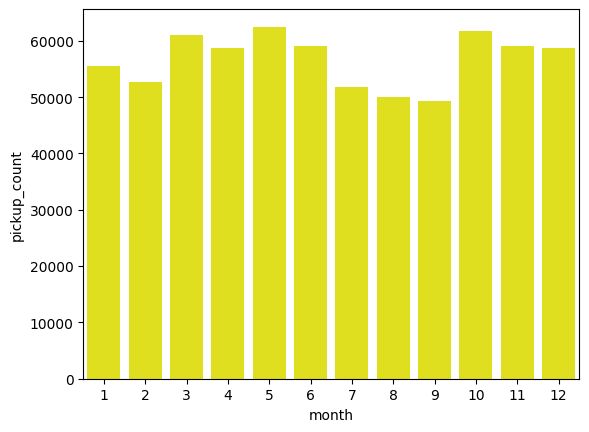

In [55]:
# Show the monthly trends in pickups
df['month'] = df['pickup_date'].dt.month
monthly_trend = df.groupby('month').size().reset_index(name='pickup_count')
print(monthly_trend.head())
sns.barplot(x='month', y='pickup_count', data=monthly_trend, color='yellow')


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [56]:
# Analyse the above parameters

list1 = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero values
print("Zero values:")
print((df[list1] == 0).sum())

# Check for negative values
print("\nNegative values:")
print((df[list1] < 0).sum())



Zero values:
fare_amount         197
tip_amount       152248
total_amount         94
trip_distance      7177
dtype: int64

Negative values:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [57]:
# yes removed the rows where trip_distance,fare_amount and total_amount is 0 


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [58]:
# Create a df with non zero entries for the selected parameters.

df = df[~(df.trip_distance == 0)]
df = df[~(df.fare_amount == 0)]
df = df[~(df.total_amount == 0)]
df.shape


(673015, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='month', ylabel='total_amount_val'>

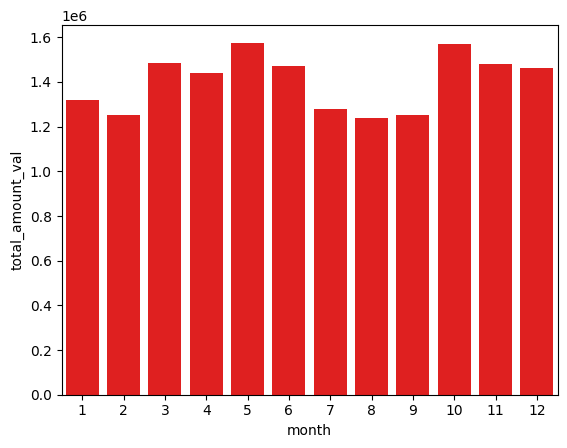

In [59]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index(name='total_amount_val')
monthly_revenue
sns.barplot(x='month', y='total_amount_val', data=monthly_revenue, color='red')



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<Axes: xlabel='quarter', ylabel='total_amount_val'>

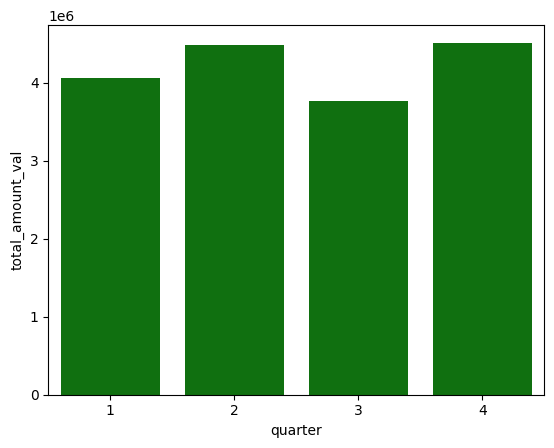

In [60]:
# Calculate proportion of each quarter
df['quarter'] = df['pickup_date'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index(name='total_amount_val')

sns.barplot(x='quarter', y='total_amount_val', data=quarterly_revenue, color='green')

In [61]:
# Step 1: Group and sum revenue by quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index(name='total_amount_val')

# Step 2: Calculate total revenue
total_revenue = quarterly_revenue['total_amount_val'].sum()

# Step 3: Add proportion column
quarterly_revenue['proportion'] = quarterly_revenue['total_amount_val'] / total_revenue
quarterly_revenue

quarter  total_amount_val  proportion
0        1        4054852.53    0.241045
1        2        4485416.51    0.266640
2        3        3769048.45    0.224055
3        4        4512659.24    0.268260

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 673015 entries, 0 to 758583
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOLocationID           673015 non-null  int64         
 1   PULocationID           673015 non-null  int64         
 2   RatecodeID             673015 non-null  float64       
 3   VendorID               673015 non-null  int64         
 4   congestion_surcharge   673015 non-null  float64       
 5   extra                  673015 non-null  float64       
 6   fare_amount            673015 non-null  float64       
 7   improvement_surcharge  673015 non-null  float64       
 8   mta_tax                673015 non-null  float64       
 9   passenger_count        673015 non-null  float64       
 10  payment_type           673015 non-null  int64         
 11  pickup_date            673015 non-null  datetime64[ns]
 12  pickup_hour            673015 non-null  int64    

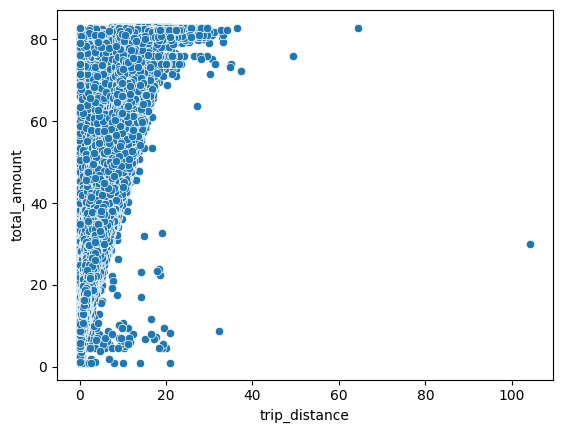

In [63]:
# Show how trip fare is affected by distance
sns.scatterplot(data=df, x='trip_distance', y='total_amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [64]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


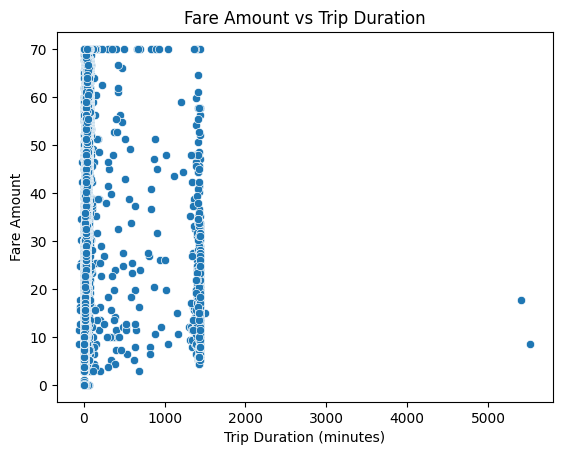

In [65]:
# Show relationship between fare and trip duration
sns.scatterplot(data=df, x='trip_duration', y='fare_amount')
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()


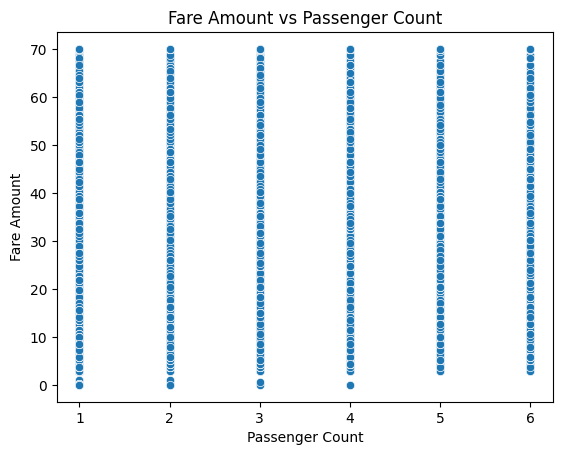

In [66]:
# Show relationship between fare and number of passengers
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()


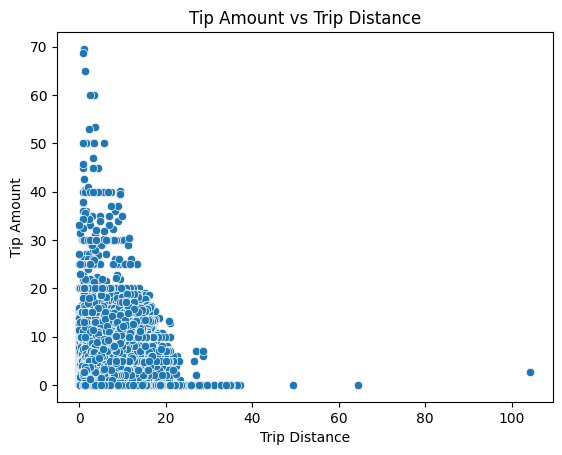

In [67]:
# Show relationship between tip and trip distance


sns.scatterplot(data=df, x='trip_distance', y='tip_amount')
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [68]:
# Analyse the distribution of different payment types (payment_type).

unique_payment_types = df['payment_type'].unique()
unique_payment_types


array([1, 2, 4, 3])

In [69]:
payment_type_counts = df['payment_type'].value_counts().reset_index(name='cnt')
payment_type_counts

payment_type     cnt
0             1  546965
1             2  119036
2             4    4624
3             3    2390

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [70]:
import geopandas as gpd

# Replace 'your_file_path.shp' with the actual path to your shapefile
zones = gpd.read_file('taxi_zones.shp')

# Display the first few rows of the shapefile data
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    154 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

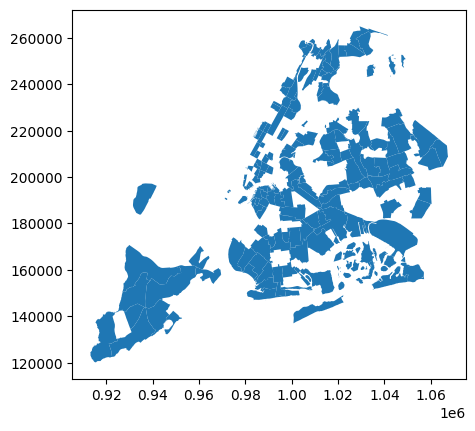

In [71]:
print(zones.info())
zones.plot()

In [72]:
before = zones.memory_usage(deep=True).sum()
before

np.int64(44707)

In [73]:
# Optimize float columns
zones[['Shape_Leng', 'Shape_Area']] = zones[['Shape_Leng', 'Shape_Area']].astype('float32')

# Convert object columns with repeated strings to category
zones['zone'] = zones['zone'].astype('category')
zones['borough'] = zones['borough'].astype('category')

# No change for geometry and int32 columns


In [74]:
after = zones.memory_usage(deep=True).sum()
after

np.int64(34987)

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [75]:
# Merge zones and trip records using locationID and PULocationID
df1 = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
len(df1)

673031

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [76]:
# Group data by location and calculate the number of trips

pickup_counts = df1.groupby('LocationID').size().reset_index(name='trip_count').sort_values('trip_count', ascending=False)
pickup_counts

LocationID  trip_count
194       237.0       33873
129       161.0       32869
193       236.0       30294
130       162.0       25335
152       186.0       24416
..          ...         ...
96        126.0           1
169       208.0           1
197       240.0           1
208       253.0           1
206       250.0           1

[218 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [77]:
len(df1)

673031

In [79]:
len(zones)

263

In [80]:
# Merge trip counts back to the zones GeoDataFrame

pickup_counts = df1.groupby('LocationID').size().reset_index(name='trip_count')
zones_with_counts = zones.merge(pickup_counts, left_on='LocationID', right_on='LocationID', how='left')
zones_with_counts


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx                                               None   
259         Queens                                               None   
260      Manhattan                                               None   
261      Manhattan                                               None   
262      Manhattan                                               None   

     trip_count  
0           5.0  
1           NaN  
2           NaN  
3         680.0  
4           NaN  
..          ...  
258         NaN  
259        91.0  
260      3590.0  
261      8987.0  
262     13451.0  

[263 rows x 8 columns]

In [81]:
len(zones_with_counts)

263

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

     LocationID                          zone  trip_count
236         237         Upper East Side South     33873.0
160         161                Midtown Center     32869.0
235         236         Upper East Side North     30294.0
161         162                  Midtown East     25335.0
185         186  Penn Station/Madison Sq West     24416.0
141         142           Lincoln Square East     23441.0
229         230     Times Sq/Theatre District     22865.0
137         138             LaGuardia Airport     21764.0
169         170                   Murray Hill     20697.0
162         163                 Midtown North     20356.0


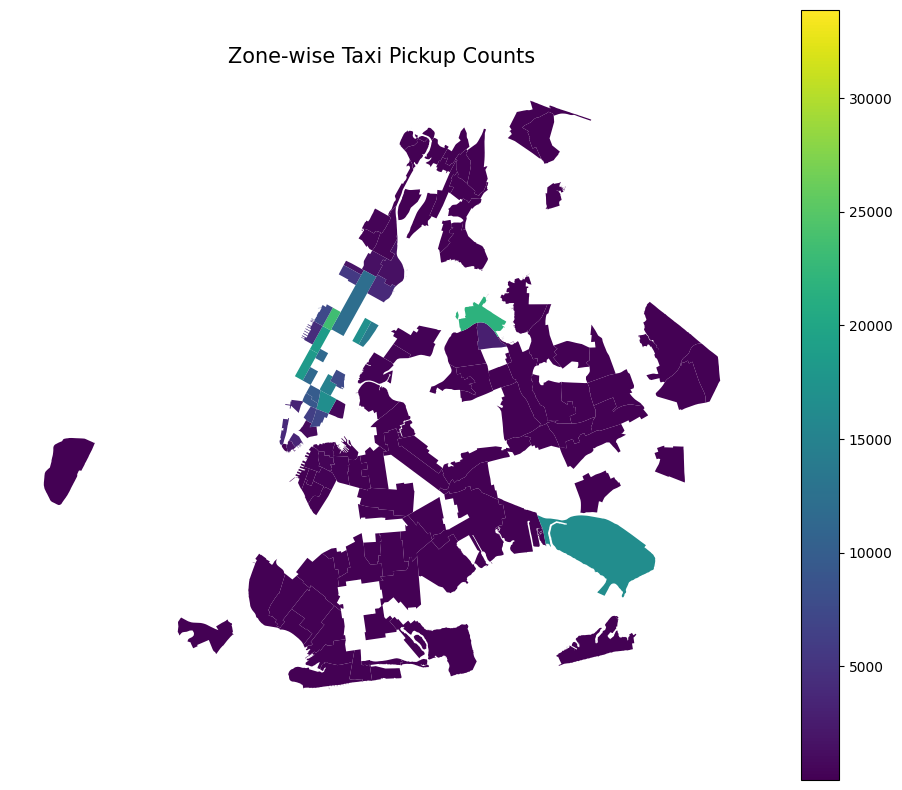

In [82]:
# Define figure and axis
# Plot the map and display it

zones_with_counts_sorted = zones_with_counts.sort_values(by='trip_count', ascending=False)
print(zones_with_counts_sorted[['LocationID', 'zone', 'trip_count']].head(10))
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame with color coding based on trip counts
zones_with_counts.plot(column='trip_count',
                       legend=True,
                       ax=ax)

# Add a title
ax.set_title('Zone-wise Taxi Pickup Counts', fontsize=15)

# Remove axis
ax.axis('off')

# Show plot
plt.show()




In [84]:
# can you try displaying the zones DF sorted by the number of trips?
merged_df1_sorted = zones_with_counts.sort_values(by='trip_count',ascending=False)
merged_df1_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   

     LocationID    borough geometry  trip_count  
236         237  Manhattan     None     33873.0  
160         161  Manhattan     None     32869.0  
235         236  Manhattan     None     30294.0  
161         162  Manhattan     None     25335.0  
185         186  Manhattan     None     24416.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [85]:
# getting drop off data as weell
df_final = df1.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left',suffixes=('', '_dropoff') )
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673209 entries, 0 to 673208
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOLocationID           673209 non-null  int64         
 1   PULocationID           673209 non-null  int64         
 2   RatecodeID             673209 non-null  float64       
 3   VendorID               673209 non-null  int64         
 4   congestion_surcharge   673209 non-null  float64       
 5   extra                  673209 non-null  float64       
 6   fare_amount            673209 non-null  float64       
 7   improvement_surcharge  673209 non-null  float64       
 8   mta_tax                673209 non-null  float64       
 9   passenger_count        673209 non-null  float64       
 10  payment_type           673209 non-null  int64         
 11  pickup_date            673209 non-null  datetime64[ns]
 12  pickup_hour            673209 non-null  int6

In [86]:
df_final['tpep_pickup_datetime'] = pd.to_datetime(df_final['tpep_pickup_datetime'])
df_final['tpep_dropoff_datetime'] = pd.to_datetime(df_final['tpep_dropoff_datetime'])
df_final['trip_duration'] = (df_final['tpep_dropoff_datetime'] - df_final['tpep_pickup_datetime']).dt.total_seconds() / 3600


In [87]:
# Find routes which have the slowest speeds at different times of the day
# Speed on a route X for hour Y = (distance of the route X / average trip duration for hour Y)

route_avg = df_final.groupby(['zone', 'zone_dropoff', 'pickup_hour']).agg(
    total_distance=('trip_distance', 'sum'),
    avg_duration=('trip_duration', 'mean')
).reset_index()

route_avg['speed'] = route_avg['total_distance'] / route_avg['avg_duration']

/tmp/ipykernel_158251/2774694063.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_avg = df_final.groupby(['zone', 'zone_dropoff', 'pickup_hour']).agg(


In [88]:
route_avg=route_avg[route_avg['speed']>0]

In [89]:
route_avg3=route_avg.sort_values('speed',ascending=True)
route_avg3

zone                       zone_dropoff  \
1424221   Two Bridges/Seward Park        Downtown Brooklyn/MetroTech   
599144           Garment District                            Astoria   
1600433                  Woodside                    Jackson Heights   
673246    Greenwich Village North  University Heights/Morris Heights   
1388658                 Sunnyside     Long Island City/Hunters Point   
...                           ...                                ...   
1459505     Upper East Side South              Upper East Side North   
1459504     Upper East Side South              Upper East Side North   
1459506     Upper East Side South              Upper East Side North   
1497102  Washington Heights North           Washington Heights North   
783013                    Jamaica                            Jamaica   

         pickup_hour  total_distance  avg_duration         speed  
1424221           13            0.49     92.040556      0.005324  
599144             8            0.22      5.573889      0.039470  
1600433           17            0.96     23.560556      0.040746  
673246            22            0.28      5.820556      0.048105  
1388658           18            2.40     45.165000      0.053138  
...              ...             ...           ...           ...  
1459505           17          420.28      0.124950   3363.582628  
1459504           16          435.02      0.125684   3461.226794  
1459506           18          379.19      0.105901   3580.594494  
1497102            6            5.90      0.001111   5310.000000  
783013            13           19.40      0.000556  34920.000000  

[81687 rows x 6 columns]

In [162]:
route_avg3['speed_rank'] = route_avg3.groupby('pickup_hour')['speed'].rank(method='dense', ascending=True)

In [164]:
main_slow_route=route_avg3[route_avg3['speed_rank'] ==1]
main_slow_route

zone                       zone_dropoff  \
1424221        Two Bridges/Seward Park        Downtown Brooklyn/MetroTech   
599144                Garment District                            Astoria   
1600433                       Woodside                    Jackson Heights   
673246         Greenwich Village North  University Heights/Morris Heights   
1388658                      Sunnyside     Long Island City/Hunters Point   
523369        Financial District North               TriBeCa/Civic Center   
415038                   East Elmhurst                  LaGuardia Airport   
870220             Little Italy/NoLiTa                          Hudson Sq   
57177                     Battery Park                          Chinatown   
1107452                     Park Slope                        JFK Airport   
834495               LaGuardia Airport                    Randalls Island   
764215                Inwood Hill Park                   Inwood Hill Park   
872488             Little Italy/NoLiTa                 South Williamsburg   
541571                        Flatiron                            Seaport   
914547                Manhattan Valley                   Manhattan Valley   
1604762             World Trade Center                       Clinton East   
1417853           TriBeCa/Civic Center                Crown Heights North   
1405020  Sutton Place/Turtle Bay North                          Chinatown   
527496        Financial District South                Little Italy/NoLiTa   
1440686                       Union Sq            Two Bridges/Seward Park   
448570               East Harlem South                           Union Sq   
1619375                 Yorkville West                  LaGuardia Airport   
996645                   Midtown South          Prospect-Lefferts Gardens   
416635                   East Elmhurst                           Rosedale   

         pickup_hour  total_distance  avg_duration     speed  speed_rank  
1424221           13            0.49     92.040556  0.005324         1.0  
599144             8            0.22      5.573889  0.039470         1.0  
1600433           17            0.96     23.560556  0.040746         1.0  
673246            22            0.28      5.820556  0.048105         1.0  
1388658           18            2.40     45.165000  0.053138         1.0  
523369             1            1.45     22.669167  0.063964         1.0  
415038             6            1.49     17.376111  0.085750         1.0  
870220             4            1.07     11.897222  0.089937         1.0  
57177              9            2.09     23.027778  0.090760         1.0  
1107452           20            2.29     24.996944  0.091611         1.0  
834495            15            0.02      0.193333  0.103448         1.0  
764215             7            0.02      0.173333  0.115385         1.0  
872488            16            2.97     23.653889  0.125561         1.0  
541571            11            3.77     23.799167  0.158409         1.0  
914547             3            0.01      0.055556  0.180000         1.0  
1604762            2            4.63     23.323611  0.198511         1.0  
1417853            5            4.71     23.273889  0.202373         1.0  
1405020           12            5.77     23.848889  0.241940         1.0  
527496             0            3.62     11.968611  0.302458         1.0  
1440686           14            4.05     12.051389  0.336061         1.0  
448570            10            4.97     13.371667  0.371681         1.0  
1619375           23            4.40     11.397778  0.386040         1.0  
996645            21           10.42     23.833889  0.437193         1.0  
416635            19           14.96     23.051111  0.648993         1.0

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<Axes: xlabel='pickup_hour', ylabel='trip_cnt'>

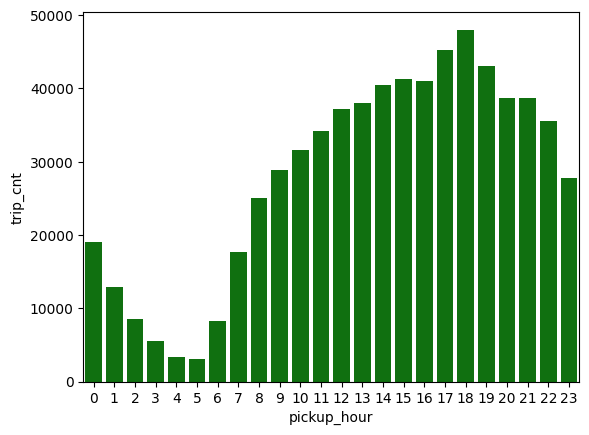

In [90]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df_final['pickup_hour'].value_counts().sort_values(ascending=False).reset_index(name='trip_cnt')

sns.barplot(x='pickup_hour', y='trip_cnt', data=trips_per_hour, color='green')


In [91]:
trips_per_hour.head(5)

pickup_hour  trip_cnt
0           18     48039
1           17     45199
2           19     43115
3           15     41359
4           16     40975

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [92]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

import pandas as pd

# Trip counts for busiest hours from 5% sample
busiest_hours_counts = {
    18: 48039,
    17: 45199,
    19: 43115,
    15: 41359,
    16: 40975
}

# Convert to DataFrame for easier handling
busiest_df = pd.DataFrame(list(busiest_hours_counts.items()), columns=['hour', 'trip_count_5pct'])
print(busiest_df)

# Sampling fraction
sampling_fraction = 0.02

# Scale up to 100% by dividing by the sample fraction
busiest_df['trip_count_100pct'] = busiest_df['trip_count_5pct'] / sampling_fraction

# Optional: convert to int if you want rounded counts
busiest_df['trip_count_100pct'] = busiest_df['trip_count_100pct'].astype(int)

print(busiest_df)







   hour  trip_count_5pct
0    18            48039
1    17            45199
2    19            43115
3    15            41359
4    16            40975
   hour  trip_count_5pct  trip_count_100pct
0    18            48039            2401950
1    17            45199            2259950
2    19            43115            2155750
3    15            41359            2067950
4    16            40975            2048750


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

day_type
Weekday    490202
Weekend    183007
Name: count, dtype: int64


<Axes: xlabel='day_type'>

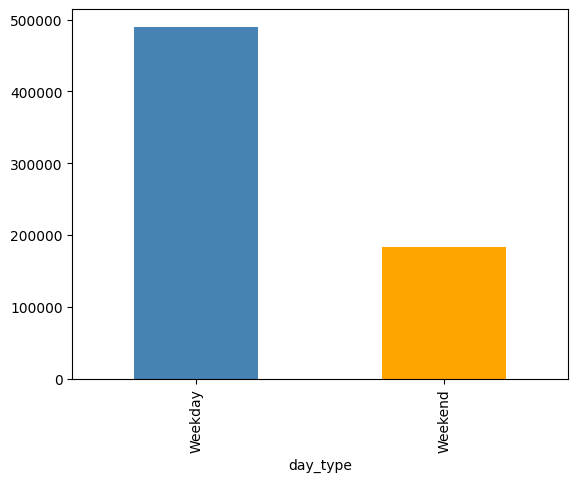

In [93]:
# Compare traffic trends for the week days and weekends

df_final['day_type'] = df_final['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
trip_counts = df_final['day_type'].value_counts()
print(trip_counts)
trip_counts.plot(kind='bar', color=['steelblue', 'orange'])

In [94]:
hourly_counts = df_final.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

In [95]:
hourly_pivot = hourly_counts.pivot(index='pickup_hour', columns='day_type', values='trip_count').fillna(0)
hourly_pivot

day_type     Weekday  Weekend
pickup_hour                  
0               9292     9733
1               4785     8154
2               2620     5937
3               1583     3947
4               1340     1976
5               2390      730
6               7002     1268
7              15562     2138
8              21564     3527
9              23031     5790
10             23840     7811
11             25009     9190
12             26737    10410
13             27263    10691
14             29663    10791
15             30458    10901
16             29815    11160
17             33788    11411
18             36555    11484
19             32419    10696
20             29472     9253
21             29575     9118
22             26650     8905
23             19789     7986

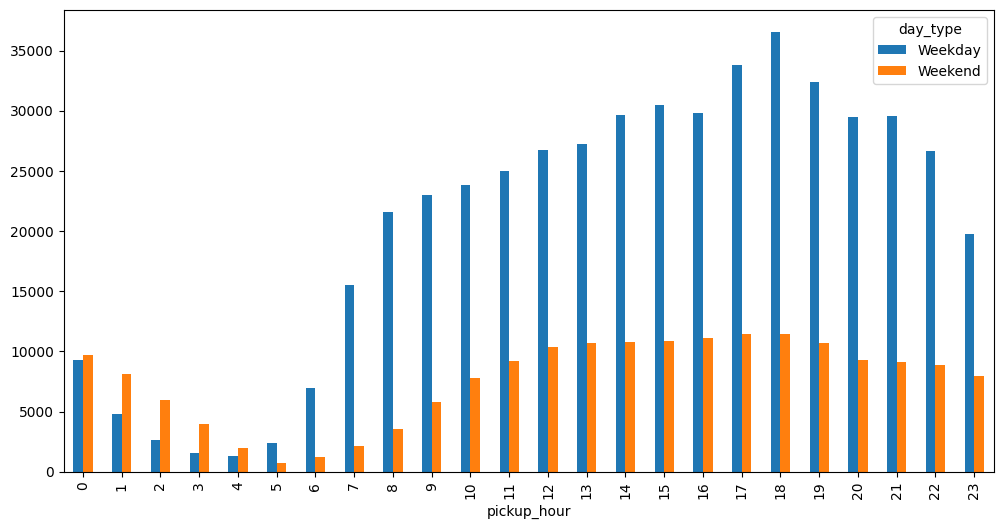

In [96]:

hourly_pivot.plot(kind='bar', figsize=(12, 6))
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [101]:
# Find top 10 pickup and dropoff zones

top_10_pickup = df_final['zone'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_10_pickup)

print("\n")
top_10_drop = df_final['zone_dropoff'].value_counts().head(10)
print("top 10 drop Zones:")
print(top_10_drop)


Top 10 Pickup Zones:
zone
Upper East Side South           33873
Midtown Center                  32872
Upper East Side North           30295
Midtown East                    25339
Penn Station/Madison Sq West    24420
Lincoln Square East             23442
Times Sq/Theatre District       22868
LaGuardia Airport               21804
Murray Hill                     20699
Midtown North                   20357
Name: count, dtype: int64


top 10 drop Zones:
zone_dropoff
Upper East Side North        31446
Upper East Side South        30148
Midtown Center               26923
Murray Hill                  20472
Times Sq/Theatre District    20000
Midtown East                 19936
Lincoln Square East          19768
Upper West Side South        19471
Lenox Hill West              18529
East Chelsea                 17339
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [122]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import numpy as np
pickup_counts = df_final['zone'].value_counts().rename('pickup_count')
pickup_counts

dropoff_counts = df_final['zone_dropoff'].value_counts().rename('dropoff_count')
dropoff_counts

zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
zone_counts
# print(len(zone_counts))

zone_counts = zone_counts[pickup_counts > 0]
zone_counts = zone_counts[dropoff_counts > 0]
# print(len(zone_counts))

zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']


zone_counts=zone_counts[zone_counts['pickup_dropoff_ratio']>0]

zone_counts['pickup_count'] = zone_counts['pickup_count'].replace([np.inf, -np.inf], np.nan)
zone_counts['dropoff_count'] = zone_counts['dropoff_count'].replace([np.inf, -np.inf], np.nan)

# APPROACH 1

print("APPROACH1")
print("\n")
top_10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
print("top 10")
print(top_10)

# Display bottom 10 zones with lowest ratio
bottom_10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)
print("bottom_10")
print(bottom_10)

print("\n")
print("APPROACH2")
print("\n")

# APPROACH 2
# Display top 10 zones with highest ratio
top_10 = zone_counts.sort_values(by=['pickup_count','pickup_dropoff_ratio'], ascending=[False, False]).head(10)

print("top 10")
print(top_10)
print("\n")

# # Display bottom 10 zones with lowest ratio
bottom_10 = zone_counts.sort_values(by=['dropoff_count','pickup_dropoff_ratio'], ascending=[False, False]).head(10)
print("bottom_10")
print(bottom_10)


APPROACH1


top 10
                              pickup_count  dropoff_count  \
East Elmhurst                         2893            346   
JFK Airport                          16540           2571   
LaGuardia Airport                    21804           7507   
Penn Station/Madison Sq West         24420          15472   
Central Park                         12071           8572   
Greenwich Village South               9199           6666   
West Village                         15897          11595   
Midtown East                         25339          19936   
Midtown Center                       32872          26923   
Garment District                     11510           9444   

                              pickup_dropoff_ratio  
East Elmhurst                             8.361272  
JFK Airport                               6.433294  
LaGuardia Airport                         2.904489  
Penn Station/Madison Sq West              1.578335  
Central Park                              1.

/tmp/ipykernel_158251/3805878850.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zone_counts = zone_counts[dropoff_counts > 0]


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [124]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


night_hours = [23, 0, 1, 2, 3, 4, 5]

night_df = df_final[df_final['pickup_hour'].isin(night_hours)]

pickup_counts = night_df.groupby('zone').size().reset_index(name='pickup_count')

# Sort in descending order and take top 10
top_10_pickups = pickup_counts.sort_values(by='pickup_count', ascending=False).head(10)

print("top_10_pickups")
print(top_10_pickups)




dropoff_counts = night_df.groupby('zone_dropoff').size().reset_index(name='pickup_count1')

# Sort in descending order and take top 10
top_10_dropoff = dropoff_counts.sort_values(by='pickup_count1', ascending=False).head(10)

print("top_10_dropoff")

print(top_10_dropoff)


top_10_pickups
                             zone  pickup_count
75                   East Village          6016
245                  West Village          4918
45                   Clinton East          3993
143               Lower East Side          3821
108       Greenwich Village South          3309
226     Times Sq/Theatre District          3181
123                   JFK Airport          3054
182  Penn Station/Madison Sq West          2636
159                 Midtown South          2410
64                   East Chelsea          2286
top_10_dropoff
                      zone_dropoff  pickup_count1
75                    East Village           3149
45                    Clinton East           2719
165                    Murray Hill           2377
101                       Gramercy           2269
64                    East Chelsea           2197
136                Lenox Hill West           1990
259                 Yorkville West           1897
245                   West Village        

/tmp/ipykernel_158251/1964651824.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pickup_counts = night_df.groupby('zone').size().reset_index(name='pickup_count')
/tmp/ipykernel_158251/1964651824.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dropoff_counts = night_df.groupby('zone_dropoff').size().reset_index(name='pickup_count1')


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [125]:
# Filter for night hours (11 PM to 5 AM)


night_hours = [23, 0, 1, 2, 3, 4, 5]

df_final['time_of_day'] = df_final['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')


revenue_share = df_final.groupby('time_of_day')['total_amount'].sum().reset_index()

total_revenue = revenue_share['total_amount'].sum()
revenue_share['revenue_percent'] = (revenue_share['total_amount'] / total_revenue) * 100

print(revenue_share)


  time_of_day  total_amount  revenue_percent
0         Day   14752317.59        87.655012
1       Night    2077658.59        12.344988


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [126]:
# Analyse the fare per mile per passenger for different passenger counts

df_final['fare_per_mile_per_passenger'] = df_final['fare_amount'] / (df_final['trip_distance'] * df_final['passenger_count'])
df_final['fare_per_mile_per_passenger'].describe()



count    673209.000000
mean          8.809372
std          88.051087
min           0.000357
25%           4.545455
50%           6.554455
75%           8.532110
max        7000.000000
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

<BarContainer object of 24 artists>

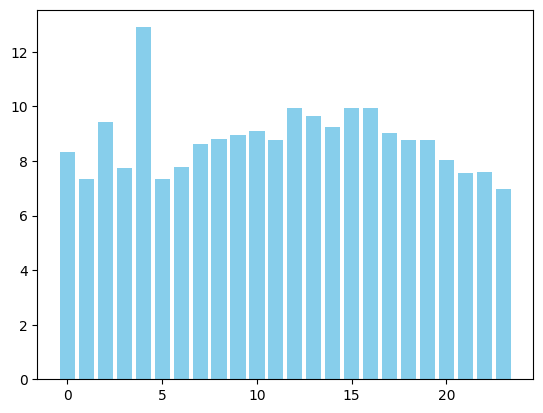

In [127]:
avg_by_hour = df_final[df_final['trip_distance'] > 0].groupby('pickup_hour')['fare_per_mile_per_passenger'].mean().reset_index()
avg_by_hour
plt.bar(avg_by_hour['pickup_hour'], avg_by_hour['fare_per_mile_per_passenger'], color='skyblue')

In [129]:
avg_by_day = df_final[df_final['trip_distance'] > 0].groupby('day_of_week')['fare_per_mile_per_passenger'].mean().reset_index()
avg_by_day

day_of_week  fare_per_mile_per_passenger
0            0                     8.637807
1            1                     8.918602
2            2                     9.521925
3            3                     9.222001
4            4                     8.554245
5            5                     8.231503
6            6                     8.434467

<BarContainer object of 7 artists>

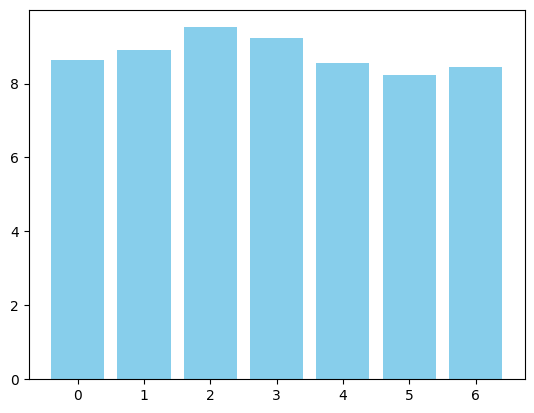

In [130]:
plt.bar(avg_by_day['day_of_week'],avg_by_day['fare_per_mile_per_passenger'], color='skyblue')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<Axes: xlabel='pickup_hour', ylabel='fare_per_mile_per_passenger'>

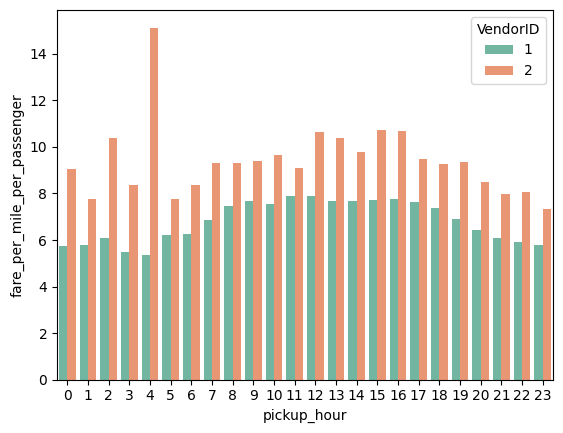

In [131]:
# Compare fare per mile for different vendors
vendor_hour_avg = df_final.groupby(['VendorID', 'pickup_hour'])['fare_per_mile_per_passenger'].mean().reset_index()
vendor_hour_avg
sns.barplot(
    data=vendor_hour_avg,
    x='pickup_hour',
    y='fare_per_mile_per_passenger',
    hue='VendorID',
    palette='Set2'
)


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [132]:
# Defining distance tiers

print(df_final['trip_distance'].describe())


# Filter out zero or near-zero distances to avoid division issues
df_final = df_final[df_final['trip_distance'] > 0]

# Create distance tier column
def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

df_final['distance_tier'] = df_final['trip_distance'].apply(distance_tier)



count    673209.000000
mean          2.721393
std           2.959353
min           0.010000
25%           1.050000
50%           1.700000
75%           3.000000
max         104.300000
Name: trip_distance, dtype: float64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [134]:


#  Analyze tip percentages based on distances, passenger counts and pickup times
import numpy as np

df_final['tip_percentage'] = np.where(
    df_final['fare_amount'] > 0,
    (df_final['tip_amount'] / df_final['fare_amount']) * 100,
    0
)
df_final


DOLocationID  PULocationID  RatecodeID  VendorID  \
0                114           234         1.0         2   
1                 87            48         1.0         1   
2                 68           246         1.0         1   
3                148           114         1.0         1   
4                263           263         1.0         2   
...              ...           ...         ...       ...   
673204            68            50         1.0         2   
673205           158            79         1.0         2   
673206           234           249         1.0         2   
673207           249            68         1.0         2   
673208           234           158         1.0         2   

        congestion_surcharge  extra  fare_amount  improvement_surcharge  \
0                        2.5    1.0          8.6                    1.0   
1                        2.5    3.5         23.3                    1.0   
2                        2.5    3.5          5.8                    1.0   
3                        2.5    3.5          7.9                    1.0   
4                        2.5    1.0          5.1                    1.0   
...                      ...    ...          ...                    ...   
673204                   2.5    1.0         10.0                    1.0   
673205                   2.5    1.0         15.6                    1.0   
673206                   2.5    1.0          8.6                    1.0   
673207                   2.5    1.0         10.0                    1.0   
673208                   2.5    1.0          8.6                    1.0   

        mta_tax  passenger_count  ...  Shape_Area_dropoff  \
0           0.5              3.0  ...            0.000047   
1           0.5              1.0  ...            0.000067   
2           0.5              1.0  ...            0.000111   
3           0.5              1.0  ...            0.000070   
4           0.5              3.0  ...            0.000066   
...         ...              ...  ...                 ...   
673204      0.5              1.0  ...            0.000111   
673205      0.5              1.0  ...            0.000186   
673206      0.5              1.0  ...            0.000073   
673207      0.5              5.0  ...            0.000072   
673208      0.5              3.0  ...            0.000073   

                         zone_dropoff  LocationID_dropoff borough_dropoff  \
0             Greenwich Village South               114.0       Manhattan   
1            Financial District North                87.0       Manhattan   
2                        East Chelsea                68.0       Manhattan   
3                     Lower East Side               148.0       Manhattan   
4                      Yorkville West               263.0       Manhattan   
...                               ...                 ...             ...   
673204                   East Chelsea                68.0       Manhattan   
673205  Meatpacking/West Village West               158.0       Manhattan   
673206                       Union Sq               234.0       Manhattan   
673207                   West Village               249.0       Manhattan   
673208                       Union Sq               234.0       Manhattan   

                                         geometry_dropoff  day_type  \
0       POLYGON ((986306.712 203122.786, 986300.242 20...   Weekday   
1       POLYGON ((983217.971 196831.021, 983250.399 19...   Weekday   
2       POLYGON ((983690.405 209040.369, 983550.612 20...   Weekday   
3       POLYGON ((988552.836 201677.665, 988387.669 20...   Weekday   
4                                                    None   Weekday   
...                                                   ...       ...   
673204  POLYGON ((983690.405 209040.369, 983550.612 20...   Weekday   
673205                                               None   Weekday   
673206                                               None   Weekday   
673207            

/tmp/ipykernel_158251/2921312193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='distance_tier', y='tip_percentage', estimator='mean', palette='pastel')


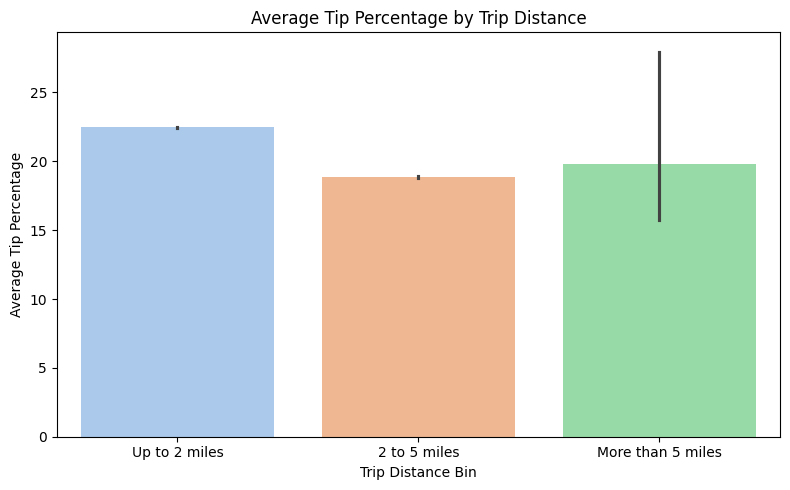

In [135]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_final, x='distance_tier', y='tip_percentage', estimator='mean', palette='pastel')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance Bin')
plt.ylabel('Average Tip Percentage')
plt.tight_layout()
plt.show()

/tmp/ipykernel_158251/1124463987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='pickup_hour', y='tip_percentage', estimator='mean', palette='pastel')


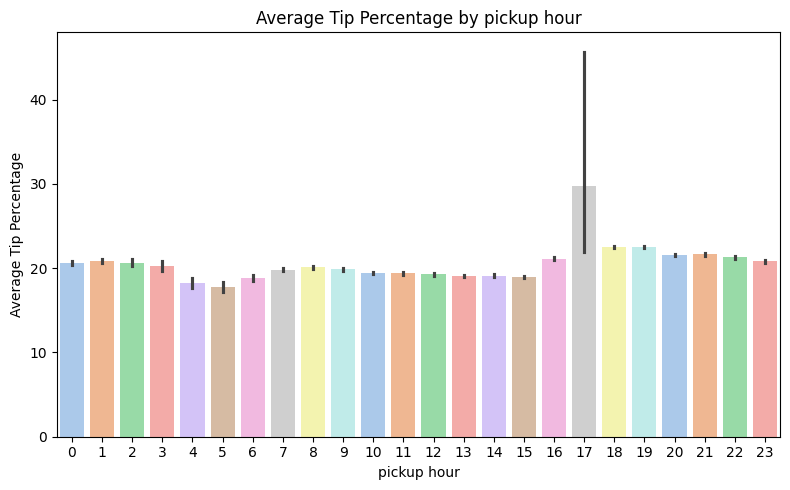

In [136]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_final, x='pickup_hour', y='tip_percentage', estimator='mean', palette='pastel')
plt.title('Average Tip Percentage by pickup hour')
plt.xlabel('pickup hour')
plt.ylabel('Average Tip Percentage')
plt.tight_layout()
plt.show()


/tmp/ipykernel_158251/4130842376.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='passenger_bin', y='tip_percentage', estimator='mean', palette='pastel')


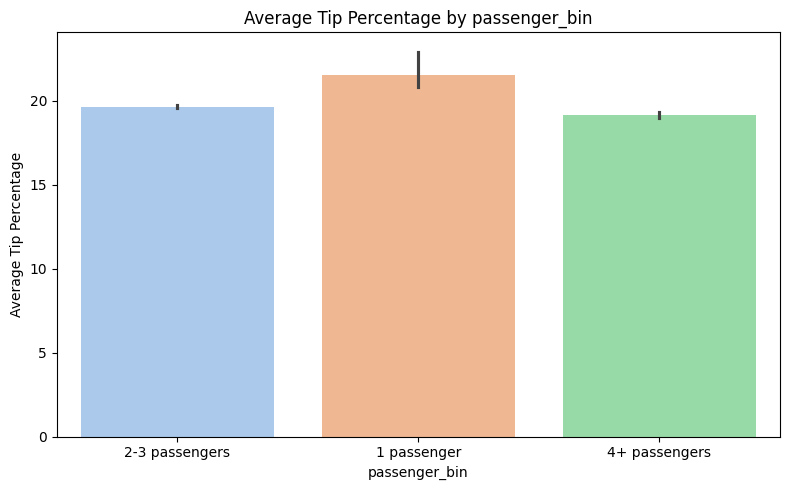

In [137]:
def passenger_bin(count):
    if count <= 1:
        return '1 passenger'
    elif count <= 3:
        return '2-3 passengers'
    else:
        return '4+ passengers'

df_final['passenger_bin'] = df_final['passenger_count'].apply(passenger_bin)


plt.figure(figsize=(8, 5))
sns.barplot(data=df_final, x='passenger_bin', y='tip_percentage', estimator='mean', palette='pastel')
plt.title('Average Tip Percentage by passenger_bin')
plt.xlabel('passenger_bin')
plt.ylabel('Average Tip Percentage')
plt.tight_layout()
plt.show()


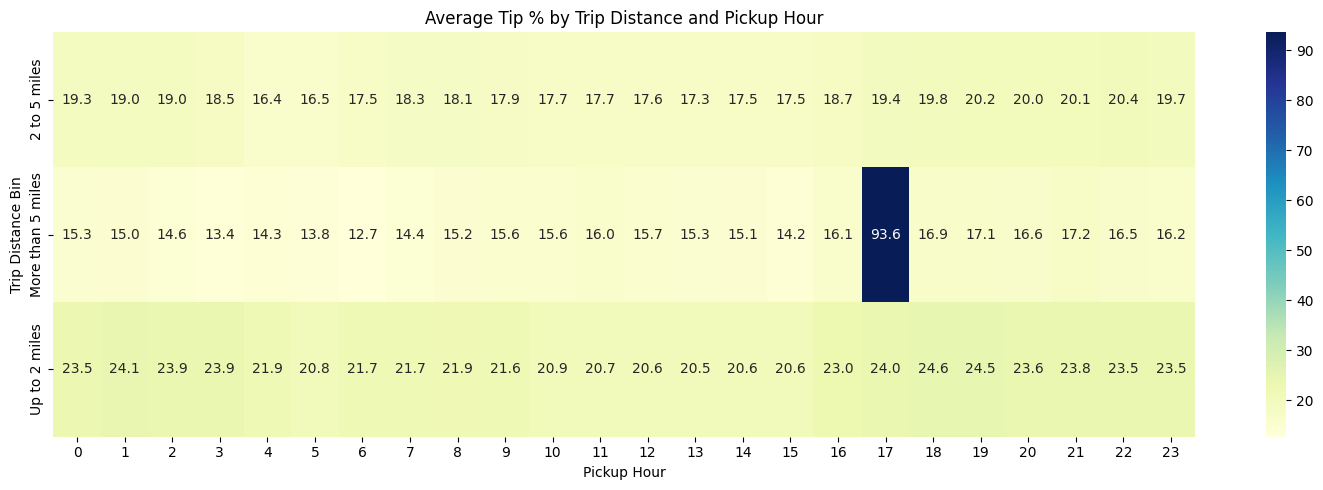

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for heatmap
heat_data = df_final.pivot_table(
    index='distance_tier',
    columns='pickup_hour',
    values='tip_percentage',
    aggfunc='mean'
)

plt.figure(figsize=(15, 5))
sns.heatmap(heat_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Tip % by Trip Distance and Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Distance Bin')
plt.tight_layout()
plt.show()



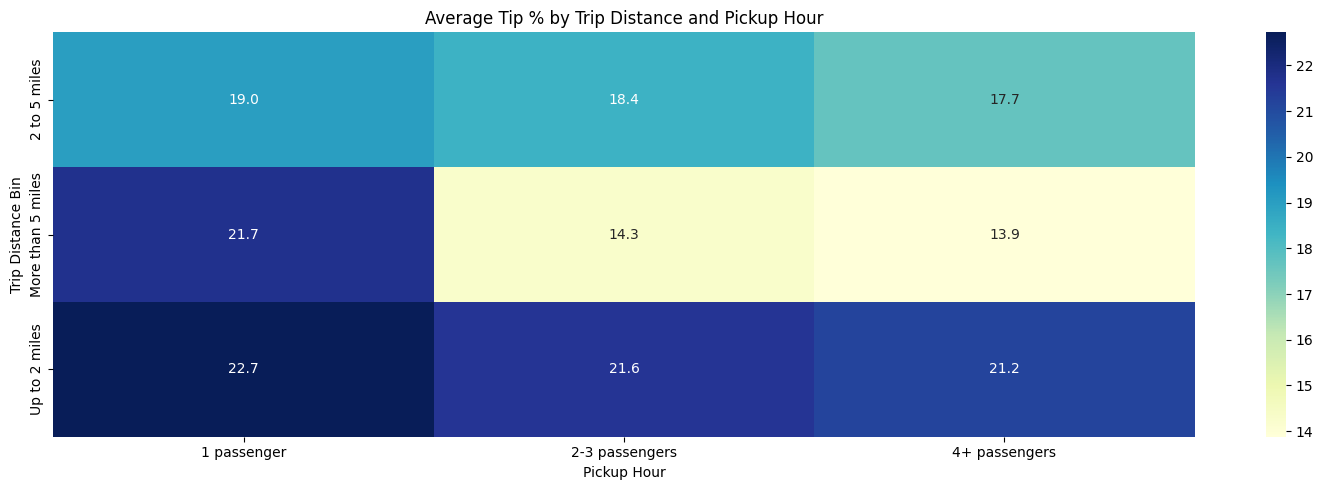

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for heatmap
heat_data = df_final.pivot_table(
    index='distance_tier',
    columns='passenger_bin',
    values='tip_percentage',
    aggfunc='mean'
)

plt.figure(figsize=(15, 5))
sns.heatmap(heat_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Tip % by Trip Distance and Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Distance Bin')
plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [140]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


low_tips = df_final[df_final['tip_percentage'] < 10]
high_tips = df_final[df_final['tip_percentage'] > 25]


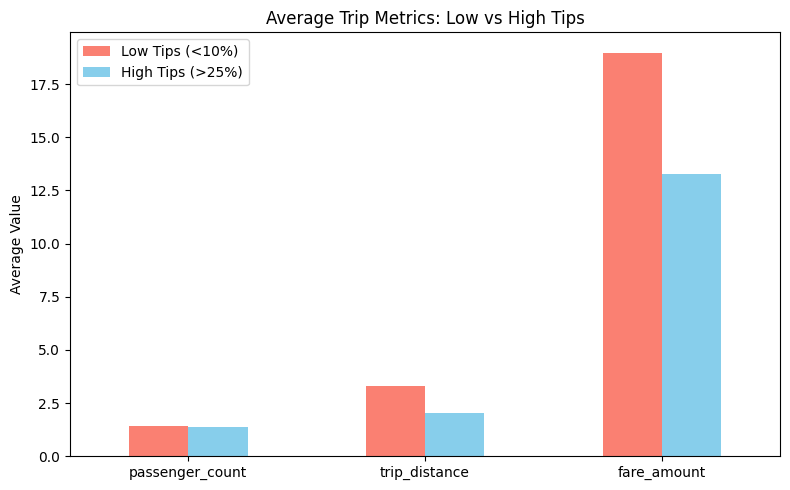

In [141]:
import matplotlib.pyplot as plt

metrics = ['passenger_count', 'trip_distance', 'fare_amount']
low_means = low_tips[metrics].mean()
high_means = high_tips[metrics].mean()

compare_df = pd.DataFrame({'Low Tips (<10%)': low_means, 'High Tips (>25%)': high_means})
compare_df.plot(kind='bar', figsize=(8, 5), color=['salmon', 'skyblue'])
plt.title('Average Trip Metrics: Low vs High Tips')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [142]:
# Summary stats for numeric columns
numeric_cols = ['trip_distance', 'passenger_count', 'fare_amount', 'tip_amount', 'pickup_hour']

print("Low tips (<10%) stats:")
print(low_tips[numeric_cols].describe())

print("\nHigh tips (>25%) stats:")
print(high_tips[numeric_cols].describe())


Low tips (<10%) stats:
       trip_distance  passenger_count    fare_amount     tip_amount  \
count  175339.000000    175339.000000  175339.000000  175339.000000   
mean        3.293259         1.437992      18.990345       0.227056   
std         3.989753         0.919369      15.150676       0.653273   
min         0.010000         1.000000       0.010000       0.000000   
25%         1.040000         1.000000       9.300000       0.000000   
50%         1.800000         1.000000      13.500000       0.000000   
75%         3.500000         2.000000      22.600000       0.000000   
max        64.490000         6.000000      70.000000       6.750000   

         pickup_hour  
count  175339.000000  
mean       13.959131  
std         5.763073  
min         0.000000  
25%        10.000000  
50%        14.000000  
75%        18.000000  
max        23.000000  

High tips (>25%) stats:
       trip_distance  passenger_count    fare_amount     tip_amount  \
count  313794.000000    313794.000

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

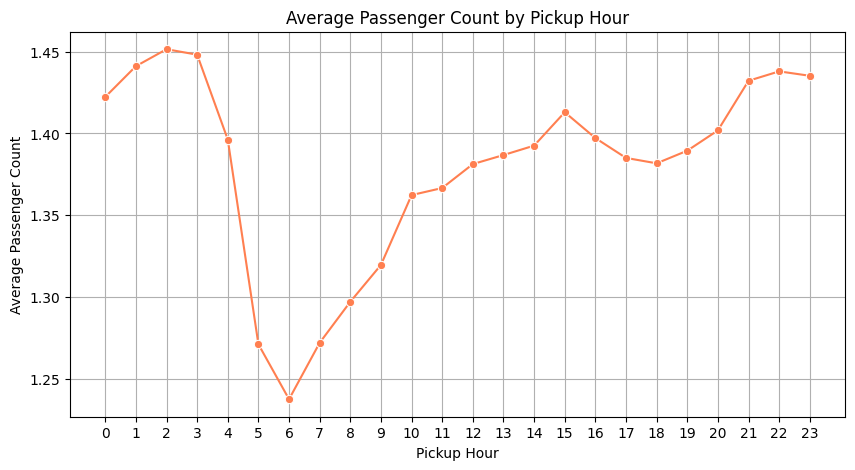

In [145]:
# See how passenger count varies across hours and days
# Aggregate average passenger count by pickup hour
avg_passenger_hour = df_final.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_passenger_hour, x='pickup_hour', y='passenger_count', marker='o', color='coral')
plt.title('Average Passenger Count by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


/tmp/ipykernel_158251/1925068823.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_passenger_day, x='day_name', y='passenger_count', palette='viridis')


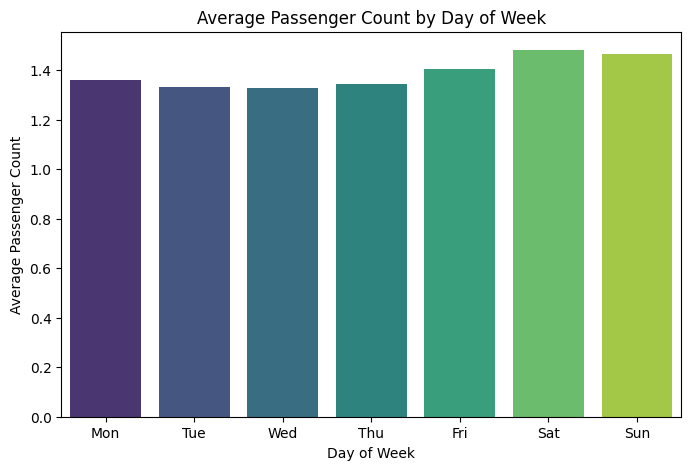

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate average passenger count by day of week
avg_passenger_day = df_final.groupby('day_of_week')['passenger_count'].mean().reset_index()

# Map numeric day to weekday name
day_name_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_passenger_day['day_name'] = avg_passenger_day['day_of_week'].map(day_name_map)

plt.figure(figsize=(8,5))
sns.barplot(data=avg_passenger_day, x='day_name', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.show()




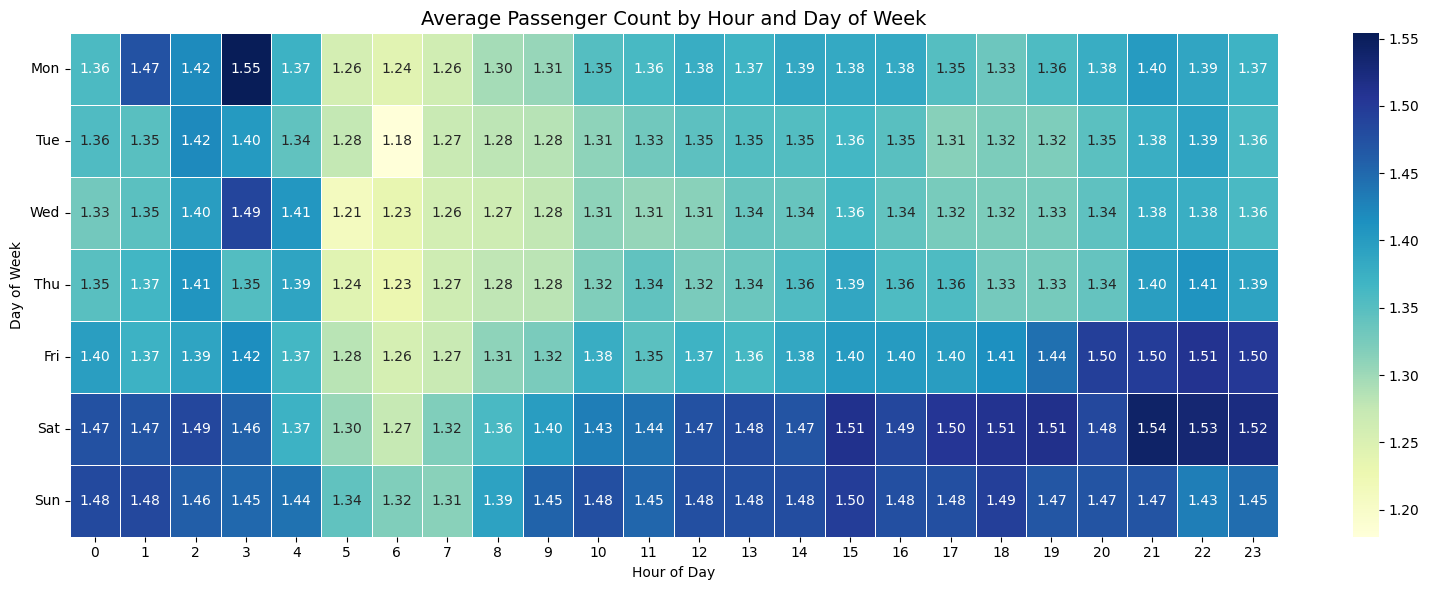

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create pivot table: average passenger count by day_of_week and pickup_hour
passenger_pivot = df_final.pivot_table(
    values='passenger_count',
    index='day_of_week',       # Rows: Days of the week (0 = Monday, ..., 6 = Sunday)
    columns='pickup_hour',     # Columns: Hours of the day (0–23)
    aggfunc='mean'
)

# Map numeric days to names for better readability
day_name_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
passenger_pivot.index = passenger_pivot.index.map(day_name_map)

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title('Average Passenger Count by Hour and Day of Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [149]:
avg_passenger_by_hour_day = df_final.groupby(['day_of_week', 'pickup_hour'])['passenger_count'].mean().reset_index()

avg_passenger_by_hour_day.head()

day_of_week  pickup_hour  passenger_count
0            0            0         1.359209
1            0            1         1.472914
2            0            2         1.418182
3            0            3         1.553846
4            0            4         1.371795

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [150]:
# How does passenger count vary across zones

avg_passenger_by_do = df_final.groupby('zone')['passenger_count'].mean().reset_index().sort_values(by='passenger_count',ascending=False)

avg_passenger_by_do



/tmp/ipykernel_158251/3674855535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_passenger_by_do = df_final.groupby('zone')['passenger_count'].mean().reset_index().sort_values(by='passenger_count',ascending=False)


zone  passenger_count
174  Ocean Parkway South              6.0
54          Country Club              3.0
127      Jamaica Estates              3.0
179           Pelham Bay              3.0
63         Dyker Heights              3.0
..                   ...              ...
217            Stapleton              NaN
223     Sunset Park East              NaN
241        West Brighton              NaN
247          Westerleigh              NaN
255   Woodlawn/Wakefield              NaN

[260 rows x 2 columns]

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [151]:
df_final.to_csv('df_final.csv', index=False)

In [152]:
pickup_extra1 = df_final.groupby('zone').size().reset_index(name='trip_cnt')
pickup_extra1 = pickup_extra1[pickup_extra1['trip_cnt']>0]
print(pickup_extra1)


pickup_extra2 = df_final[df_final['extra']>0]
pickup_extra3 = pickup_extra2.groupby('zone').size().reset_index(name='extra_cnt')
print(pickup_extra3)

                        zone  trip_cnt
1              Alphabet City       680
3    Arrochar/Fort Wadsworth         7
4                    Astoria       255
6                 Auburndale         3
7               Baisley Park        47
..                       ...       ...
254                Woodhaven         3
256                 Woodside        92
257       World Trade Center      3590
258           Yorkville East      8987
259           Yorkville West     13452

[218 rows x 2 columns]
                        zone  extra_cnt
0    Allerton/Pelham Gardens          0
1              Alphabet City        561
2              Arden Heights          0
3    Arrochar/Fort Wadsworth          5
4                    Astoria        120
..                       ...        ...
255       Woodlawn/Wakefield          0
256                 Woodside         46
257       World Trade Center       2010
258           Yorkville East       4335
259           Yorkville West       7846

[260 rows x 2 columns]


/tmp/ipykernel_158251/941810447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pickup_extra1 = df_final.groupby('zone').size().reset_index(name='trip_cnt')
/tmp/ipykernel_158251/941810447.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pickup_extra3 = pickup_extra2.groupby('zone').size().reset_index(name='extra_cnt')


In [153]:
# pick up zone where extra charge is more frequent 

merged_df = pickup_extra1.merge(pickup_extra3, left_on='zone', right_on='zone', how='left')
merged_df['freq']=merged_df['extra_cnt']/merged_df['trip_cnt']
merged_df.sort_values(by=['trip_cnt', 'freq'], ascending=[False, False], inplace=True)
merged_df.head(5)


zone  trip_cnt  extra_cnt      freq
194         Upper East Side South     33873      19137  0.564963
128                Midtown Center     32872      21157  0.643618
193         Upper East Side North     30295      15877  0.524080
129                  Midtown East     25339      15722  0.620466
152  Penn Station/Madison Sq West     24420      14208  0.581818

In [154]:
pickup_extra1 = df_final.groupby('zone_dropoff').size().reset_index(name='trip_cnt')
pickup_extra1 = pickup_extra1[pickup_extra1['trip_cnt']>0]
print(pickup_extra1.head(5))


pickup_extra2 = df_final[df_final['extra']>0]
pickup_extra3 = pickup_extra2.groupby('zone_dropoff').size().reset_index(name='extra_cnt')
print(pickup_extra3.head(5))

              zone_dropoff  trip_cnt
0  Allerton/Pelham Gardens        23
1            Alphabet City      2560
3  Arrochar/Fort Wadsworth        12
4                  Astoria      1967
5             Astoria Park        12
              zone_dropoff  extra_cnt
0  Allerton/Pelham Gardens         21
1            Alphabet City       1964
2            Arden Heights          0
3  Arrochar/Fort Wadsworth          7
4                  Astoria       1598


/tmp/ipykernel_158251/4239447936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pickup_extra1 = df_final.groupby('zone_dropoff').size().reset_index(name='trip_cnt')
/tmp/ipykernel_158251/4239447936.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pickup_extra3 = pickup_extra2.groupby('zone_dropoff').size().reset_index(name='extra_cnt')


In [155]:
# drop off zone where extra charge is more frequent 

merged_df = pickup_extra1.merge(pickup_extra3, left_on='zone_dropoff', right_on='zone_dropoff', how='left')
merged_df['freq']=merged_df['extra_cnt']/merged_df['trip_cnt']
merged_df.sort_values(by=['trip_cnt', 'freq'], ascending=[False, False], inplace=True)
merged_df.head(5)

zone_dropoff  trip_cnt  extra_cnt      freq
217      Upper East Side North     31446      18126  0.576417
218      Upper East Side South     30148      16560  0.549290
147             Midtown Center     26923      13448  0.499499
156                Murray Hill     20472      12713  0.620995
211  Times Sq/Theatre District     20000      11858  0.592900

In [156]:
# hours where extra charge is more frequent 
pickup_extra1 = df_final.groupby('pickup_hour').size().reset_index(name='trip_cnt')
pickup_extra1 = pickup_extra1[pickup_extra1['trip_cnt']>0]
print(pickup_extra1)


pickup_extra2 = df_final[df_final['extra']>0]
pickup_extra3 = pickup_extra2.groupby('pickup_hour').size().reset_index(name='extra_cnt')
print(pickup_extra3)

    pickup_hour  trip_cnt
0             0     19025
1             1     12939
2             2      8557
3             3      5530
4             4      3316
5             5      3120
6             6      8270
7             7     17700
8             8     25091
9             9     28821
10           10     31651
11           11     34199
12           12     37147
13           13     37954
14           14     40454
15           15     41359
16           16     40975
17           17     45199
18           18     48039
19           19     43115
20           20     38725
21           21     38693
22           22     35555
23           23     27775
    pickup_hour  extra_cnt
0             0      18852
1             1      12846
2             2       8490
3             3       5465
4             4       3255
5             5       2993
6             6       2823
7             7       5214
8             8       7306
9             9       8616
10           10       9625
11           11      10085

In [157]:
merged_df = pickup_extra1.merge(pickup_extra3, left_on='pickup_hour', right_on='pickup_hour', how='left')
merged_df['freq']=merged_df['extra_cnt']/merged_df['trip_cnt']
merged_df.sort_values(by=['trip_cnt', 'freq'], ascending=[False, False], inplace=True)
merged_df.head(5)

pickup_hour  trip_cnt  extra_cnt      freq
18           18     48039      38841  0.808531
17           17     45199      36141  0.799597
19           19     43115      34572  0.801856
15           15     41359      12273  0.296743
16           16     40975      31223  0.762001

In [158]:
# How often is each surcharge applied?

len(df_final)

673209

In [159]:
l=df_final[df_final['extra']>0]
len(l)

422286

62% frequent 

In [160]:
l1=df_final[df_final['congestion_surcharge']>0]
len(l1)


636464

94.5% frequent

In [161]:
l2=df_final[df_final['improvement_surcharge']>0]
len(l2)

673201

99.9% frequent

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Avoid dispatching cabs to slow-speed corridors during rush hours (e.g., Downtown Brooklyn routes).

Use traffic trend insights to create dynamic routing algorithms that reroute cabs around high-congestion zones during peak hours.

Predict high-demand hours using hourly trends and adjust cab availability accordingly (e.g., increase fleet 5–7 PM).


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Pre-position cabs in top pickup zones like Upper East Side South, Times Sq, and JFK just before peak hours.

Late-night deployments should focus on East Village, Clinton East, and West Village to match demand from nightlife and airport traffic.

During weekends, focus more on tourist-heavy zones and event-centric areas as weekday commuter traffic subsides.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Introduce distance-based fare adjustments beyond 20 miles to ensure revenue aligns with long-distance operational costs.

Consider time-based surge pricing from 4 PM–7 PM where fare per mile peaks.

Offer incentives or reduced fees for tipping to encourage better driver earnings without burdening passengers.

Monitor vendor-level fare efficiency — adjust pricing if Vendor 2’s fare per mile consistently outperforms Vendor 1.


In [ ]:
To optimize operations:
Use hourly, weekly, and seasonal patterns to forecast demand and align cab availability accordingly.

Deploy location-aware dispatching strategies focusing on high-demand zones, especially during late-night and rush hours.

Analyze trip-level metrics (duration, distance, fare, tips) to better understand pricing dynamics and optimize fare structures.

Consider passenger and tipping behavior when evaluating driver performance and customer satisfaction.

Ensure dynamic supply positioning across time and zones to increase trip count and revenue while reducing idle time and travel distance without passengers.
